합성곱 신경망을 사용한 이미지 분류

In [ ]:
# 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled, val_scaled, train_target, val_target  = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()

# 첫 번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

# 두 번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 은닉층과 출력층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

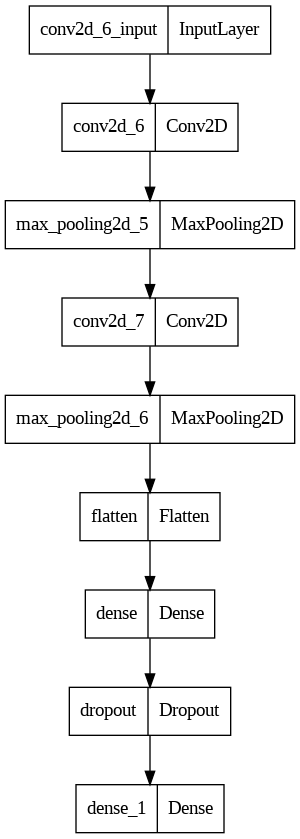

In [ ]:
keras.utils.plot_model(model)

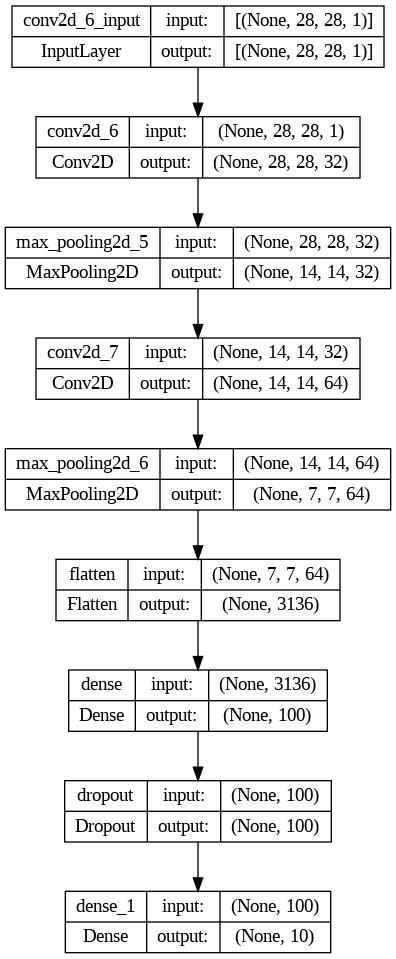

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model,h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.5262 - accuracy: 0.8129

1500/1500 [==============================] - 21s 6ms/step - loss: 0.5255 - accuracy: 0.8132 - val_loss: 0.3443 - val_accuracy: 0.8741
Epoch 2/20
1493/1500 [============================>.] - ETA: 0s - loss: 0.3486 - accuracy: 0.8756

1500/1500 [==============================] - 9s 6ms/step - loss: 0.3485 - accuracy: 0.8759 - val_loss: 0.2835 - val_accuracy: 0.8935
Epoch 3/20
1492/1500 [============================>.] - ETA: 0s - loss: 0.3002 - accuracy: 0.8926

1500/1500 [==============================] - 8s 6ms/step - loss: 0.3002 - accuracy: 0.8925 - val_loss: 0.2546 - val_accuracy: 0.9072
Epoch 4/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.9030

1500/1500 [==============================] - 8s 5ms/step - loss: 0.2685 - accuracy: 0.9030 - val_loss: 0.2462 - val_accuracy: 0.9108
Epoch 5/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.2416 - accuracy: 0.9113

1500/1500 [==============================] - 10s 7ms/step - loss: 0.2415 - accuracy: 0.9113 - val_loss: 0.2442 - val_accuracy: 0.9118
Epoch 6/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.2222 - accuracy: 0.9186

1500/1500 [==============================] - 8s 5ms/step - loss: 0.2221 - accuracy: 0.9187 - val_loss: 0.2347 - val_accuracy: 0.9141
Epoch 7/20
1493/1500 [============================>.] - ETA: 0s - loss: 0.2046 - accuracy: 0.9248

1500/1500 [==============================] - 9s 6ms/step - loss: 0.2045 - accuracy: 0.9247 - val_loss: 0.2258 - val_accuracy: 0.9188
Epoch 8/20
1492/1500 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9292

1500/1500 [==============================] - 8s 5ms/step - loss: 0.1902 - accuracy: 0.9291 - val_loss: 0.2223 - val_accuracy: 0.9210
Epoch 9/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.1757 - accuracy: 0.9345

1500/1500 [==============================] - 8s 5ms/step - loss: 0.1757 - accuracy: 0.9345 - val_loss: 0.2157 - val_accuracy: 0.9230
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1629 - accuracy: 0.9391 - val_loss: 0.2369 - val_accuracy: 0.9186
Epoch 11/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1524 - accuracy: 0.9422 - val_loss: 0.2256 - val_accuracy: 0.9250


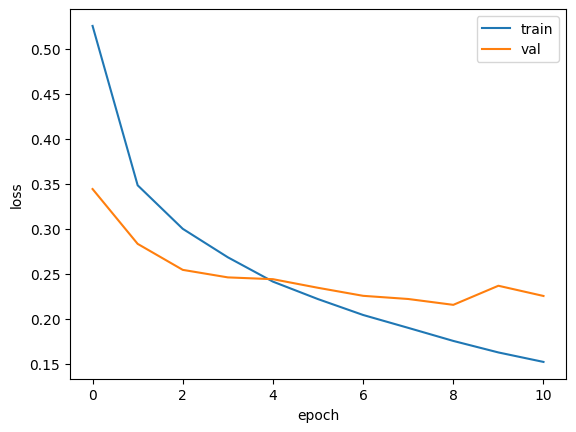

In [ ]:
# 손실 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2157 - accuracy: 0.9230


[0.215749129652977, 0.9229999780654907]

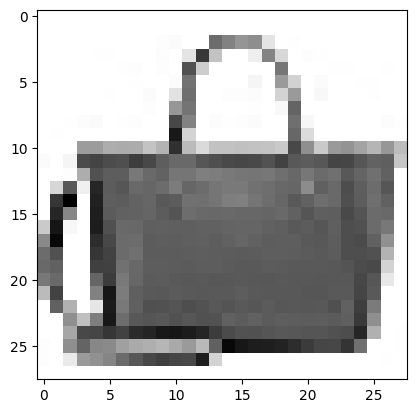

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
# predict로 확률 계산
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 22ms/step
[[4.0000355e-22 3.3762892e-31 2.1458446e-25 2.6566179e-24 6.1780204e-25
  2.1015380e-20 1.5408538e-19 8.3387173e-25 1.0000000e+00 7.2458010e-24]]


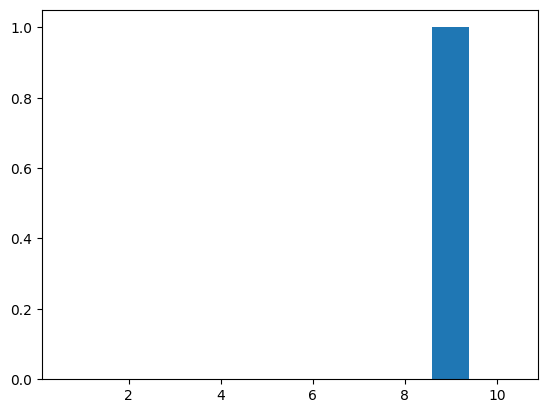

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵글부츠']

import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
# 성능 검증
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 6ms/step - loss: 0.2422 - accuracy: 0.9156


[0.24217182397842407, 0.9156000018119812]